# Root finding and optimization

## Introduction

In statistical applications, point estimation problems often boil down to maximize a function according to:

* maximize likelihood

* least squares

* maximum of a posterior distribution (i.e. bayesian)

When the function to be optimized is "smooth", we can reformulate optimization into a root finding problem.

**Trouble:** these problems often have no analytical solution.

## General setup

We will discuss 2 kinds of problems

* Root finding: solve $f(x) = 0$ for $x \in \mathbf{R}^d$, $d \geq 1$

* Optimization: maximize $g(x)$ for $x \in \mathbf{R}^d$, $d \geq 1$

We will address univariate and multivariate problems cases separately. We will look at methods that construct a sequence $\{ x_t : t \geq 0 \}$ designed to converge (as $t \xrightarrow{} \infty$) to the solution, denoted by $x^\star$.

### Theoretical considerations

* Under what conditions on $f$ (or $g$) and initial guess $x_0$ can we prove that $x_t \xrightarrow{} x^\star$?

* If $x_t \xrightarrow{} x^\star$, then how fast, i.e. what is its convergence order?

### Practical consideration

* How to write and implement the algorithm?

* Can't run the algorithm till $t = \infty$, so how to stop?

## Univariate problems

## Bisection (root-finding)

1. Find unique root $x^\star$ of $f$ in an interval $[a, b]$

* $f(a)f(b) \leq 0$ means a root exists between $a$ and $b$ (by the intermediate value theorem).

Pick an initial guess $x_0 = \frac{a + b}{2}$.

$x^\star$ must be in either $[ a, x_0 ]$ or $[ x_0, b ]$

Evaluate $f(x)$ at the end points to determine which one. The selected interval, call it $[a_1, b_1]$, is now just like the initial interval. Take $x_1 = \frac{a_1 + b_1}{2}$. Continue this process to construct a sequence $\{ x_t : t \geq 0 \}$.

### Algorithm

Assume $f(x)$ and the interval $[a, b]$ are given. 

1. Set $x = \frac{a+b}{2}$

2. If $f(a)f(b) \leq 0$, then $b=x$, else $a=x$.

3. If "converged", then stop; otherwise, return to step 1.

The convergence criteria is usually something like $| x_{new} - x_{old} | < \epsilon$ where $\epsilon$ is a specified small number (e.g. $\epsilon = 10^{-8}$).
A relative convergence riteria might be better $\frac{|x_{new} - x_{old}|}{x_{old}} < \epsilon$.

As a reminder, the limit of a sequence is defined by: $\forall \epsilon > 0, \ni N > 0$ s.t. $|U_N - l| < \epsilon$ where $N \xrightarrow{} \infty$ is the number of items in the sequence and $l$ is the value the sequence approaches.

**Theorem:** If $f$ is continuous, then $x_t \xrightarrow{} x^\star$. 

Time complexity: $\log n$

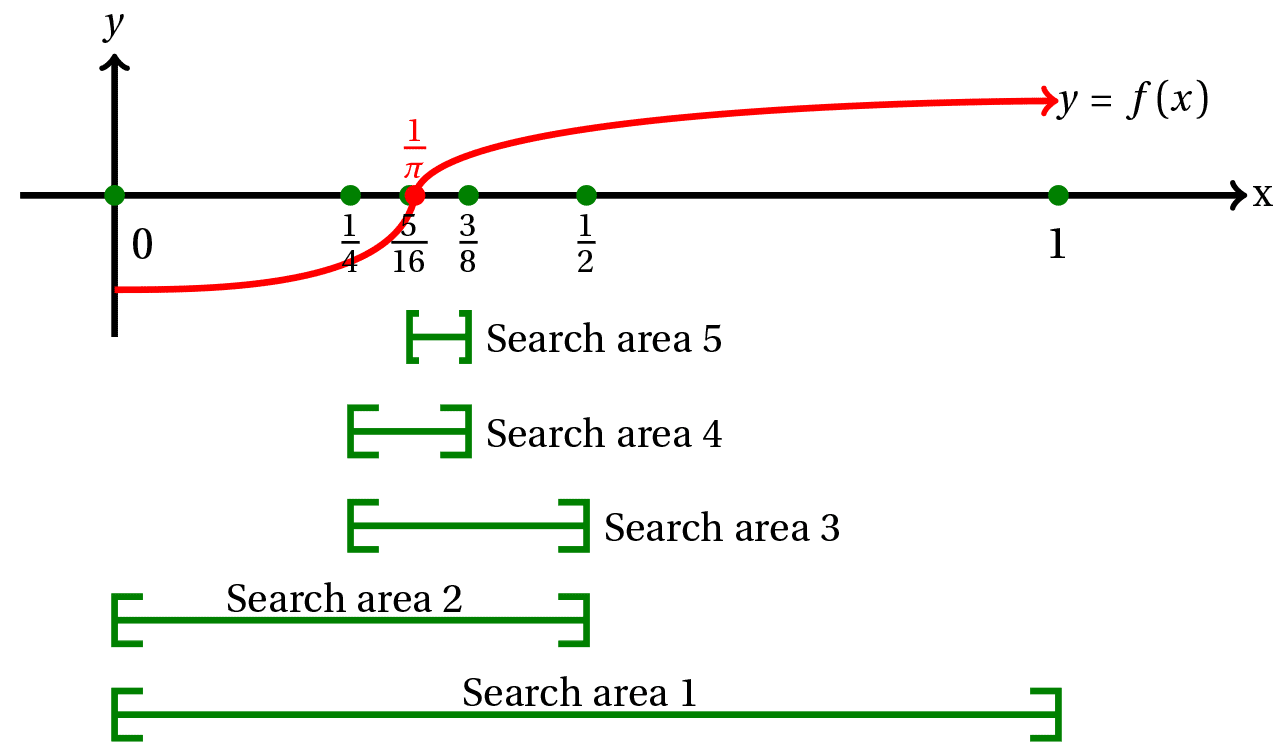

In [1]:
from utils import disp
disp('bisection_method.png')

## Newton's method (Newton-Raphson)

### Basic idea

Newton's method approximates a nonlinear function, which near its root by a linear function, can be solved by hand
It is based on Taylor's theorem, which gives the linear approximation of a function $f(x)$ in a neighborhood of some point $x_0$ as 

$$f(x) \approx f(x_0) + f^\prime(x_0) (x - x_0)$$

We can set this equal to 0 to solve for $x$

$$x = x_0 - \frac{f(x_0)}{f^\prime(x_0)}$$

### Algorithm - for root finding

Assume the function $f(x)$, its derivative $f^\prime(x)$, and an initial guess are given. 

* Set $t=0$

1. Calculate $x_{t+1} = x_t - \frac{f(x_t)}{f^\prime(x_t)}$

2. If the convergence criteria is met, then stop; otherwise, set $t \xleftarrow{} t+1$ and return to step 1.

### Warnings

Convergence depends on choice of $x_0$ and on $f$

Unlike bisection, Newton might not converge.


### Newton method theory

**Theorem**: If $f^{\prime\prime}$ is continuous and $x^\star$ is a root of $f$, with $f^\prime(x_0) \neq 0$, then there exists a neighborhood $N$ of $x^\star$ s.t. Newton's method converges to $x^\star$ for any $x_0 \in N$.

The proof uses taylor's approximation. Proof also shows that the convergence order is quadratic.

If Newton converges, then its way faster than bisection. But, added speed has a cost. It requires differentiability and the derivative $f^\prime$. Also, convergence is sensitive to choice of $x_0$.


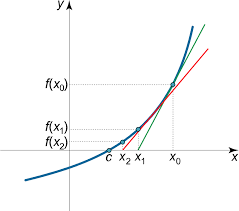

In [2]:
disp('newtons_method.png')

### Newton algorithm (for optimization)

In the context of unconstrained optimization, Newton's method can be used to find the optimum value. Apply the above method to find a root of $g^\prime(x) = 0$. The algorithm becomes 

Assume that the 1st derivative $g^\prime(x)$, its 2nd derivative $g^{\prime\prime}(x)$, and an initial guess $x_0$ are given. Set $t=0$,

i. Calculate $x_{t+1} = x_t - \frac{g^\prime(x_t)}{g^{\prime\prime}(x_t)}$

ii. If the convergence criteria is met, then stop; otherwise, set $t \xleftarrow{} t + 1$ and return to step i.

**Example:** Find $x^\star$ to maximize $g(x) = \frac{\log x}{1 + x}$, $x \in [1,5]$.

**a. Find root via bisection**



**b. Find root via newton's method**

First derivative:
-log(x)/(x + 1)**2 + 1/(x*(x + 1))
Second derivative
(2*log(x)/(x + 1)**2 - 2/(x*(x + 1)) - 1/x**2)/(x + 1)
Found exact solution.

Roots Found: Bisection: x=0.9999990463256836, Newton's Method: x=0.999999999985196, Secant method: x=None


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


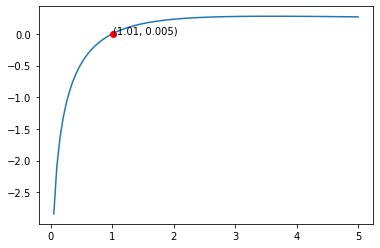

In [12]:
import numpy as np
import sympy as sym

class RootFinder:

    def __init__(self, sympy_f, x):
        self.sympy_f = sympy_f
        self.x = x
        self._calculate_derivative()
        self._calculate_derivative_2()
        self.f = self._lambify(self.sympy_f)

        self.bisection_x = None
        self.newton_x = None
        self.secant_x = None

        print('First derivative:')
        print(self.sympy_deriv)
        print('Second derivative')
        print(self.sympy_deriv_2)

    def _lambify(self, f):
        """Convert a function to a lambda function"""
        return sym.lambdify(self.x, f, "numpy")

    def _calculate_derivative(self):
        """Calculate the derivative of the function"""
        self.sympy_deriv =  sym.diff(self.sympy_f, self.x)
        self.deriv = self._lambify(self.sympy_deriv)
    
    def _calculate_derivative_2(self):
        """Calculate the second derivative of the function"""
        self.sympy_deriv_2 =  sym.diff(self.sympy_f, self.x, 2)
        self.deriv_2 = self._lambify(self.sympy_deriv_2)

    def bisection_method(self, a, b, epsilon):
        """
        Bisection method for root finding.
        """
        c = (a + b) / 2
        while abs(self.f(c)) > epsilon:
            if self.f(a) * self.f(c) < 0:
                b = c
            else:
                a = c
            c = (a + b) / 2
        self.bisection_x = c
        return c

    def newtons_method(self, x0, epsilon):
        """
        Newton's method for root finding.
        """
        x = x0
        while abs(self.f(x)) > epsilon:
            x = x - self.f(x) / self.deriv(x)
        self.newton_x = x
        return x

    def secant_method(self, a, b, N):
        '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

        Parameters
        ----------
        f : function
            The function for which we are trying to approximate a solution f(x)=0.
        a,b : numbers
            The interval in which to search for a solution. The function returns
            None if f(a)*f(b) >= 0 since a solution is not guaranteed.
        N : (positive) integer
            The number of iterations to implement.

        Returns
        -------
        m_N : number
            The x intercept of the secant line on the the Nth interval
                m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
            The initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0
            for some intercept m_n then the function returns this solution.
            If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
            iterations, the secant method fails and return None.

        Examples
        --------
        >>> f = lambda x: x**2 - x - 1
        >>> secant(f,1,2,5)
        1.6180257510729614
        '''
        f = self.f

        if f(a)*f(b) >= 0:
            print("Secant method fails.")
            return None
        a_n = a
        b_n = b
        for n in range(1,N+1):
            m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
            f_m_n = f(m_n)
            if f(a_n)*f_m_n < 0:
                a_n = a_n
                b_n = m_n
            elif f(b_n)*f_m_n < 0:
                a_n = m_n
                b_n = b_n
            elif f_m_n == 0:
                print("Found exact solution.")
                return m_n
            else:
                print("Secant method fails.")
                return None
        return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

    def visualize(self):
        print(f"\nRoots Found: Bisection: x={self.bisection_x}, Newton's Method: x={self.newton_x}, Secant method: x={self.secant_x}")
        xx = np.linspace(0, 5, 100)
        import matplotlib.pyplot as plt
        plt.plot(xx, self.f(xx))
        first_pass_idx = np.where(self.f(xx) > 0)[0][0]
        plt.plot(xx[first_pass_idx], self.f(xx[first_pass_idx]), 'ro')
        plt.annotate(f"({round(xx[first_pass_idx], 3)}, {round(rf.f(xx[first_pass_idx]),3)})", (xx[first_pass_idx], self.f(xx[first_pass_idx])))
        plt.show()

x = sym.Symbol('x')
rf = RootFinder(sym.log(x) / (x + 1), x)
b = rf.bisection_method(0, 5, 1e-6)
n = rf.newtons_method(0.5, 1e-6)
s = rf.secant_method(0.5, 5, 1000)
rf.visualize()


## Secant method

### Basic idea

Newton's method requires a formula for $f^\prime(x)$. To avoid this, approximate $f^\prime(x)$ at $x_0$ by a difference ratio. That is, recall from calculus that 
$$f^\prime(x) \approx \frac{f(x+h) - f(x)}{h}$$
where $h$ is small and positive.

This can also be expressed as
$$f^\prime(x) \approx \frac{f(x) - f(x_0)}{x - x_0}$$

The secant method follows Newton's method except we substitute a differenceratio for $f^\prime(x)$. Name is because the linear approximaiton is a secant not a tangent.

### Algorithm

Suppose $f(x)$ and 2 initial guesses $x_0$ and $x_1$ are given. Set $t=1$.

i. Calculate $x_{t+1} = x_t - \frac{f^\prime(x_t)}{\frac{f^\prime(x_t) - f^\prime(x_{t-1})}{x_t - x_{t-1}}}$

i.e. $x_{t+1} = x_t - f^\prime(x_t) \frac{x_t - x_{t-1}}{f^\prime(x_t) - f^\prime(x_{t-1})}$

If the convergence criteria are satisfied, then stop. Else, set $t\xleftarrow{} t+1$ and return to step i.

### Remarks

Can be unstable at early iterations bc the difference ratio may be a poor approximation of $f^\prime$; reasonable sacrifice if $f^\prime$ is not available.

If secant method converges, order is almost quadratic (similar to newton method).


## Fisher Scoring

In maximum likelihood applications, the goal is to find roots of the log-likelihood function, ie. $l^\prime(\hat{\theta}) = 0$.

In this context, Newton's method looks like 

$$\theta_{t+1} = \theta_t - \frac{l^\prime(\theta_t)}{l^{\prime\prime}(\theta_t)}$$

$t \geq 0$.

Recall that $-l^{\prime\prime}(\theta)$ is an approximate of the Fisher information $I_n(\theta)$. So, we can rewrite Newton's method as 

$$\theta_{t+1} = \theta_t + \frac{l^\prime(\theta_t)}{I_n(\theta_t)}$$

$t \geq 0$.

This modification is called Fisher's scoring

### Example: $g(x) = \frac{\log x}{1+x}$

#### Newton's Method

$x_{t+1} = x_t + h_t$ where $h_t = -\frac{g^\prime(x_t)}{g^{\prime\prime}(x_t)}$

$g^\prime(x) = -log(x)/(x + 1)^2 + 1/(x*(x + 1))$

The netwon increment is 

$h_t = \frac{(x_t + 1)(1 + 1/x_t - \log x_t)}{3 + 4/x_t + 1/(x_t)^2 - 2 \log x_t}$

#### Secant method

$x_{t+1} = x_t - g^\prime(x_t) \frac{x_t - x_{t-1}}{g^\prime(x_t) - g^\prime(x_{t-1})}$

## Golden section search (GSS) method

It is a simple way of finding the minimizer of a function $f$ which has a simple minimum on the interval $[a, b]$. Assume that $f(x)$ is a continuous function.

Note that the method applies as well as to find the maximum.

The ideas of GSS are similar to bisection.

In designing the method, we seek to satisfy 2 goals:

1. An optimal reduction factor for the search interval
2. minimum number of function calls

So we want to perform 1 new function evaluation in each step. Also, we want a constant reduction factor, say c, for the size of the interval.

For $x_1$ and $x_2$ in $[a,b]$, there are 2 cases.

1. if $f(x_1) < f(x_2)$, then $[a,b] \xrightarrow{} [a, x_2]$ with interval size reduction $x_2 - a = c(b-a) \xrightarrow{} x_2 = (1 - c)a + cb$
2. if $f(x_1) > f(x_2)$, then $[a,b] \xrightarrow{} [x_1, b]$ with interval size reduction $b - x_1 = c(b-a) \xrightarrow{} x_1 = ca + (1 - c)b$

Thus, once we know "c", we know the location of $x_1$ and $x_2$

Without loss of generality, we focus on the case $f(x_1) < f(x_2)$. For ease of calculation, take $[a, b] = [0, 1]$.

If $f(x_1) < f(x_2)$, then we recycle $x_1 = 1 - c$ and have to determine where to evaluate next, either a the left, or at the right of $1 - c$.

i. Suppose we place a new function evaluation at the left of $x_1 = 1 - c$. It can be shown that $c$ is obtained by solving $c^2 + c - 1 = 0$. The positive root leads to $c = \frac{-1 + \sqrt{5}}{2}$ which equals approximately $0.6180$.

ii. Suppose we place a new function evaluation at the right of $x_1 = 1 - c$. It can be shown that $c$ is obtained by solving $1 - c^2 = 0$. The (double) root of this equation is 1, which is unhelpful because it does not give any reduction! So, we exclude this possibility.

Thus, we have 2 rules:

1. If $f(x_1) < f(x_2)$, we keep $x_1$ which becomes $x_2$ and we compute a new $x_1$. using $b - x_1 = c(b-a) \xrightarrow{} x_1 = ca + (1 - c)b$. 

2. If $f(x_1) > f(x_2)$, we keep $x_2$ which becomes $x_1$ and we compute a new $x_2$. using $x_2 - a = c(b-a) \xrightarrow{} x_2 = (1 - c)a + cb$.

$c = \frac{\sqrt{5} - 1}{2}$ is called the **golden ratio**.

### GSS Algorithm

**Step 1:** Given initial interval $[a_1, b_1]$ and precision $\epsilon$, set $c = \frac{\sqrt{5} - 1}{2} = 0.618$.  Calculate $x^1_1 = b_1 - c(b_1 - a_1)$ and $x_2^1 = a_1 + c(b_1 - a_1)$.

**Step 2:** If $f(x_2^i) > f(x_1^i)$, update $a_{i+1} = a_i$, $b_{i+1} = x_2^i$, $x_2^{i+1} = x_1^i$, $x_1^{i+1} = b_{i+1} - c(b_{i+1} - a_{i+1})$

If $f(x_2^i) \leq f(x_1^i)$, update $a_{i+1} = x_1^i$, $b_{i+1} = b_i$, $x_1^{i+1} = x_2^i$, $x_2^{i+1} = a_{i+1} + c(b_{i+1} - a_{i+1})$

**Step 3:** If $|b_{i+1} - a_{i+1}| \leq \epsilon$, stop; otherwise, set $i \xleftarrow{} i+1$ and go to step 2.

## Multivariate optimization problems

### Newton's method

Suppose that $g(\vec{x})$ is a function of several variables, say $\vec{x} = (x_1, x_2, ..., x_p) \in \mathbf{R}^p$.

Newton's method works exactly the same as before, just the derivatives are more complicated.

$\dot{g}(\vec{x})$ is the gradient-vector of first partial derivatives

$\ddot{g}(\vec{x})$ is the Hessian-matrix of second partial derivatives

Based on Taylor's formula, Newton's method is $\vec{x}^{(t+1)} = \vec{x}^{(t)} - [\ddot{g}(x^{(t)})]^{-1} \dot{g}(x^{(t)})$

**Example:** Let $\vec{x} = (x_1, x_2)$ and $g(\vec{x}) = 0.5 x_1^2 + 2.5 x_2^2$

$g: \mathbf{R}^2 \xrightarrow{} \mathbf{R}$

($\mathbf{R}^p \xrightarrow{} \mathbf{R}$)

Using Newton's update, we have $\vec{x}^{(t+1)} = \vec{x}^{(t)} - [\ddot{g}(x^{(t)})]^{-1} \dot{g}(x^{(t)})$

Where $$\dot{g}(x) = \begin{bmatrix} \frac{\delta g}{\delta x_1}\\ \frac{\delta g}{\delta x_2}\end{bmatrix} = \begin{bmatrix} x_1 \\ 5x_2\\ \end{bmatrix}$$ and $$\ddot{g}(\vec{x}) = \begin{bmatrix}
\frac{\delta^2 g}{\delta x_1^2} & \frac{\delta^2 g}{\delta x_1 x_2}\\
\frac{\delta^2 g}{\delta x_2 x_1} & \frac{\delta^2 g}{\delta x_2^2}\\
\end{bmatrix} = \begin{bmatrix}
1 & 0\\
0 & 5\\
\end{bmatrix}$$

**Example:** (Example 2.4 on pg 35 in Gibbons + H)

Apply Newton's method to a complicated bivariate function

In [ ]:
# Code out above example